In [2]:
#IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#IMPORTING THE DATASET
ds1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
ds1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
ds1.shape

(891, 12)

  - Therefore the dataset has 891 rows and 12 columns. 
  - According to the problem statement, the ‘Survived’ column is our target variable
  - So the remaining 11 columns are our independent variables

In [5]:
#CHECHING FOR THE DATA TYPES OF EACH COLUMN
ds1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#CHECKING FOR NULL VALUES
ds1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So from the above output it is clear that there are three columns in which null values are there in the dataset

In [7]:
ds1=ds1.drop(columns=['PassengerId','Cabin','Name','Ticket'],axis=1)
ds1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In the above step I have deleted columns such as 'PassengerID','Ticket','Name' since it doesnot make any sense in prediction and I have deleted "Cabin" Column since it has many null values

In [8]:
#HANDLING NULL VALUES
#Applying Mean imputation technique to replace null values in "Age" coulmn
ds1['Age'].fillna(ds1['Age'].mean(),inplace=True)
ds1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [9]:
print(ds1['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [10]:
#HANDLING NULL VALUES
#Applying Mode imputation technique to replace null values in "Embarked" coulmn
ds1['Embarked'].fillna(ds1['Embarked'].mode()[0],inplace=True)
ds1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [11]:
#CHECKING AGAIN FOR NULL VALUES
ds1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
#CHECKING FOR THE COUNT OF EVERY VALUES IN EACH COULMNS
for i in ds1.columns:
    print(ds1[i].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


# STATISTICAL ANALYSIS

In [14]:
ds1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above output We can infer that

    - There are no null values in the data set
    - In Fare Column the mean is greater than median (50%) therefore the data will be skewed towards right
    - In Age column the mean is exactly equla to the median(50%) therefore the data will be normally distributed
    - There is huge difference between the 75% and the maximum value in both Age as well as Fare so the outliers will be there in the dataset

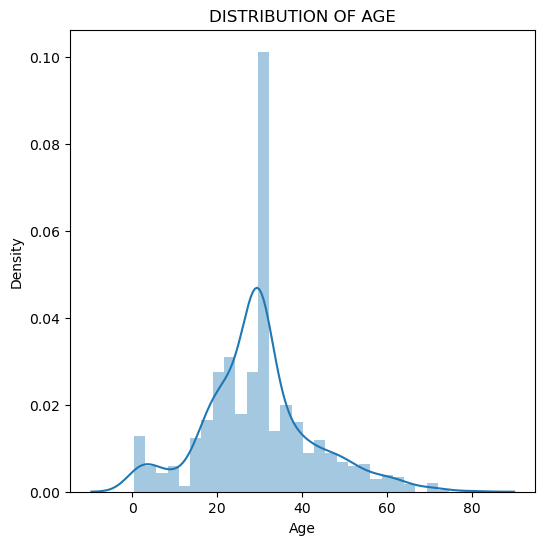

In [15]:
#DISTRIBUTION OF AGE
plt.figure(figsize=(6,6))
sns.distplot(ds1['Age'])
plt.title('DISTRIBUTION OF AGE')
plt.show()

From the above plot it is clear that most of the passengers are in between the age group of 20 to 40

<AxesSubplot:xlabel='Fare', ylabel='Density'>

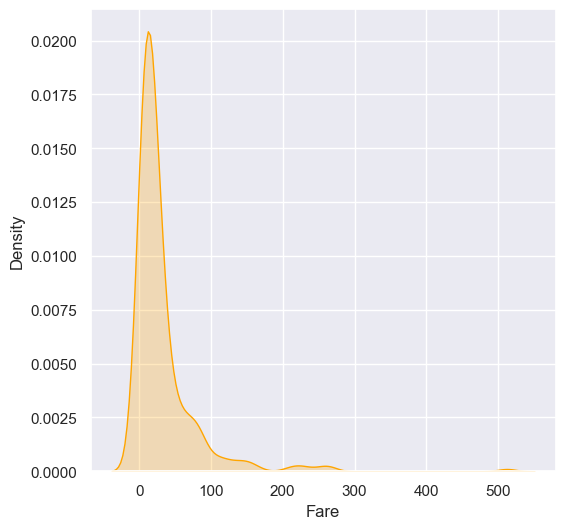

In [16]:
#FARE
sns.set(rc={'figure.figsize':(6,6)})
sns.kdeplot(ds1['Fare'],shade=True,color='orange')

As predicted earlier the data is skewed towards right

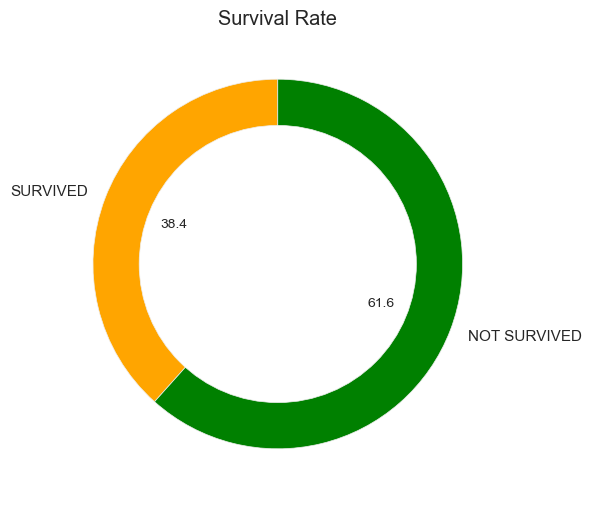

In [17]:
#COUNT OF SURVIVED AND NOT SURVIVED
plt.figure(figsize=(6,6))
Survived=['SURVIVED', 'NOT SURVIVED']
share=[342,549]
colors=['orange','green']
plt.style.use('ggplot')
plt.title('Survival Rate')
plt.pie(x=share,labels=Survived,colors=colors,autopct='%.1f',startangle=90)
circle=plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

From the above plot it is clear that around 62% of the passengers have not survived and around 38% of the passengers have been survived

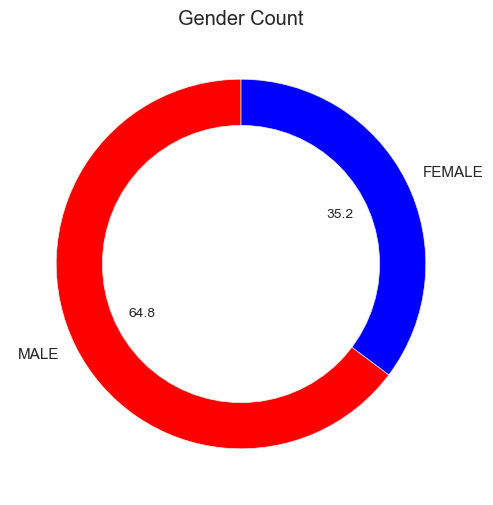

In [18]:
#COUNT OF MALE AND FEMALE
plt.figure(figsize=(6,6))
Sex=['MALE', 'FEMALE']
share=[577,314]
colors=['red','blue']
plt.style.use('ggplot')
plt.title('Gender Count')
plt.pie(x=share,labels=Sex,colors=colors,autopct='%.1f',startangle=90)
circle=plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

From the above, we can infer that most of the passengers are male

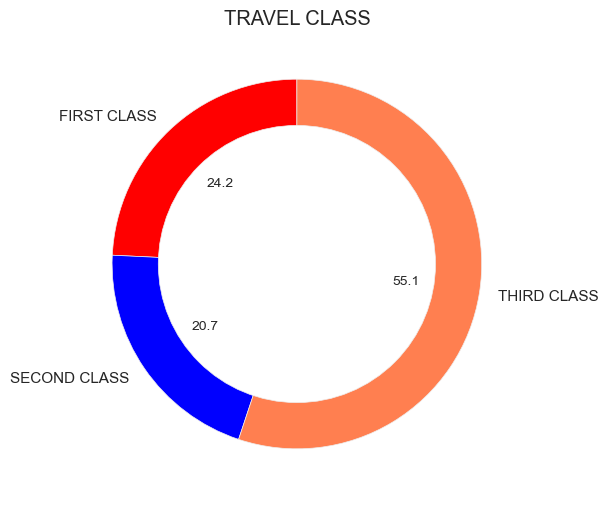

In [19]:
#COUNT OF TRAVEL CLASS
plt.figure(figsize=(6,6))
CLASS=['FIRST CLASS', 'SECOND CLASS','THIRD CLASS']
share=[216,184,491]
colors=['red','blue','coral']
plt.style.use('ggplot')
plt.title('TRAVEL CLASS')
plt.pie(x=share,labels=CLASS,colors=colors,autopct='%.1f',startangle=90)
circle=plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

More than 50% of the passengers had travelled in third class. The no. of passengers in the first class and second class are almost equal.

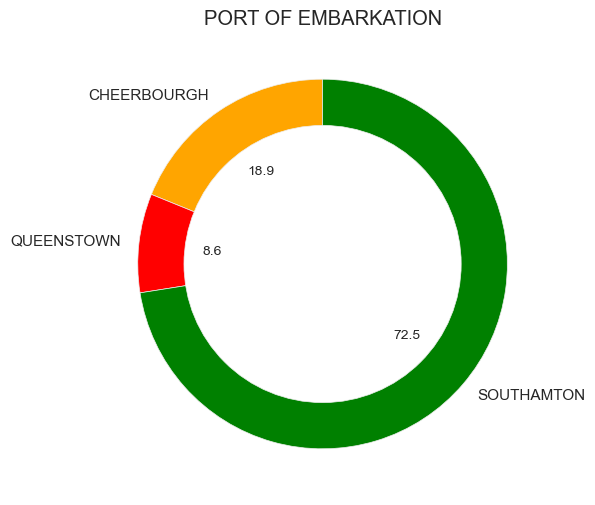

In [20]:
#COUNT OF EMBARKED
plt.figure(figsize=(6,6))
EMBARK=['CHEERBOURGH', 'QUEENSTOWN','SOUTHAMTON']
share=[168,77,646]
colors=['orange','red','green']
plt.style.use('ggplot')
plt.title('PORT OF EMBARKATION')
plt.pie(x=share,labels=EMBARK,colors=colors,autopct='%.1f',startangle=90)
circle=plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

Around 73% of the passengers embarked at Southampton, 19% at Chersborgh and 8.6% of passengers at Queenstown

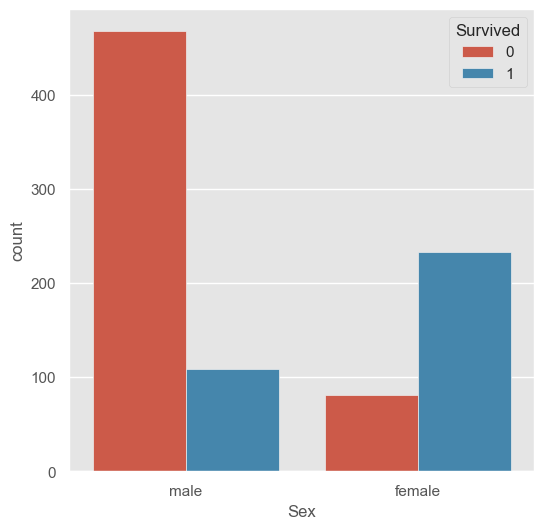

In [21]:
#GENDER AND SURVIVAL
sns.countplot('Sex',hue='Survived',data=ds1)
plt.show()

The survival rate of Female passengers are very high when compared to the survival rate of male passengers

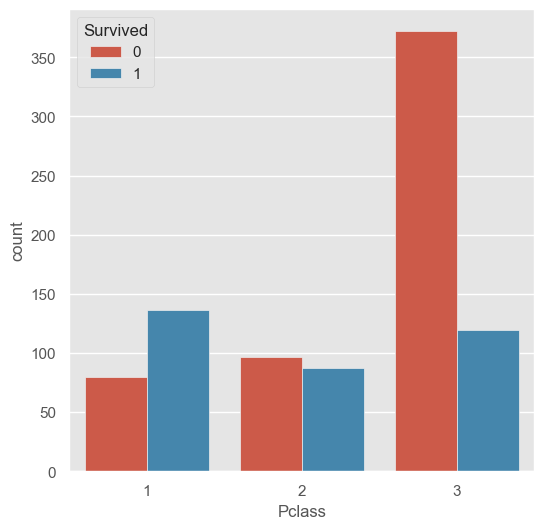

In [22]:
#TRAVEL CLASS AND SURVIVAL
sns.countplot('Pclass',hue='Survived',data=ds1)
plt.show()

The survival rate of passengers in thr first class is very high when compared to the other two classes. So the Passenger Class have very high impact in the survival rate of the passengers

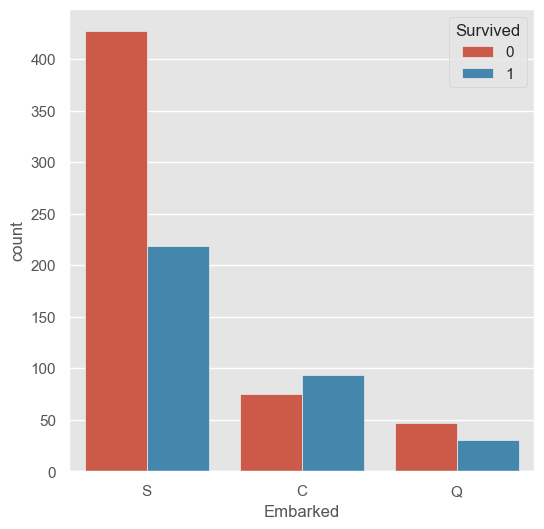

In [23]:
#TRAVEL CLASS AND SURVIVAL
sns.countplot('Embarked',hue='Survived',data=ds1)
plt.show()

The  no. of passengers who have survived is greater than no. of passengers who have not been survived in case of Chersborgh. Whereas in other two cases it is viceversa

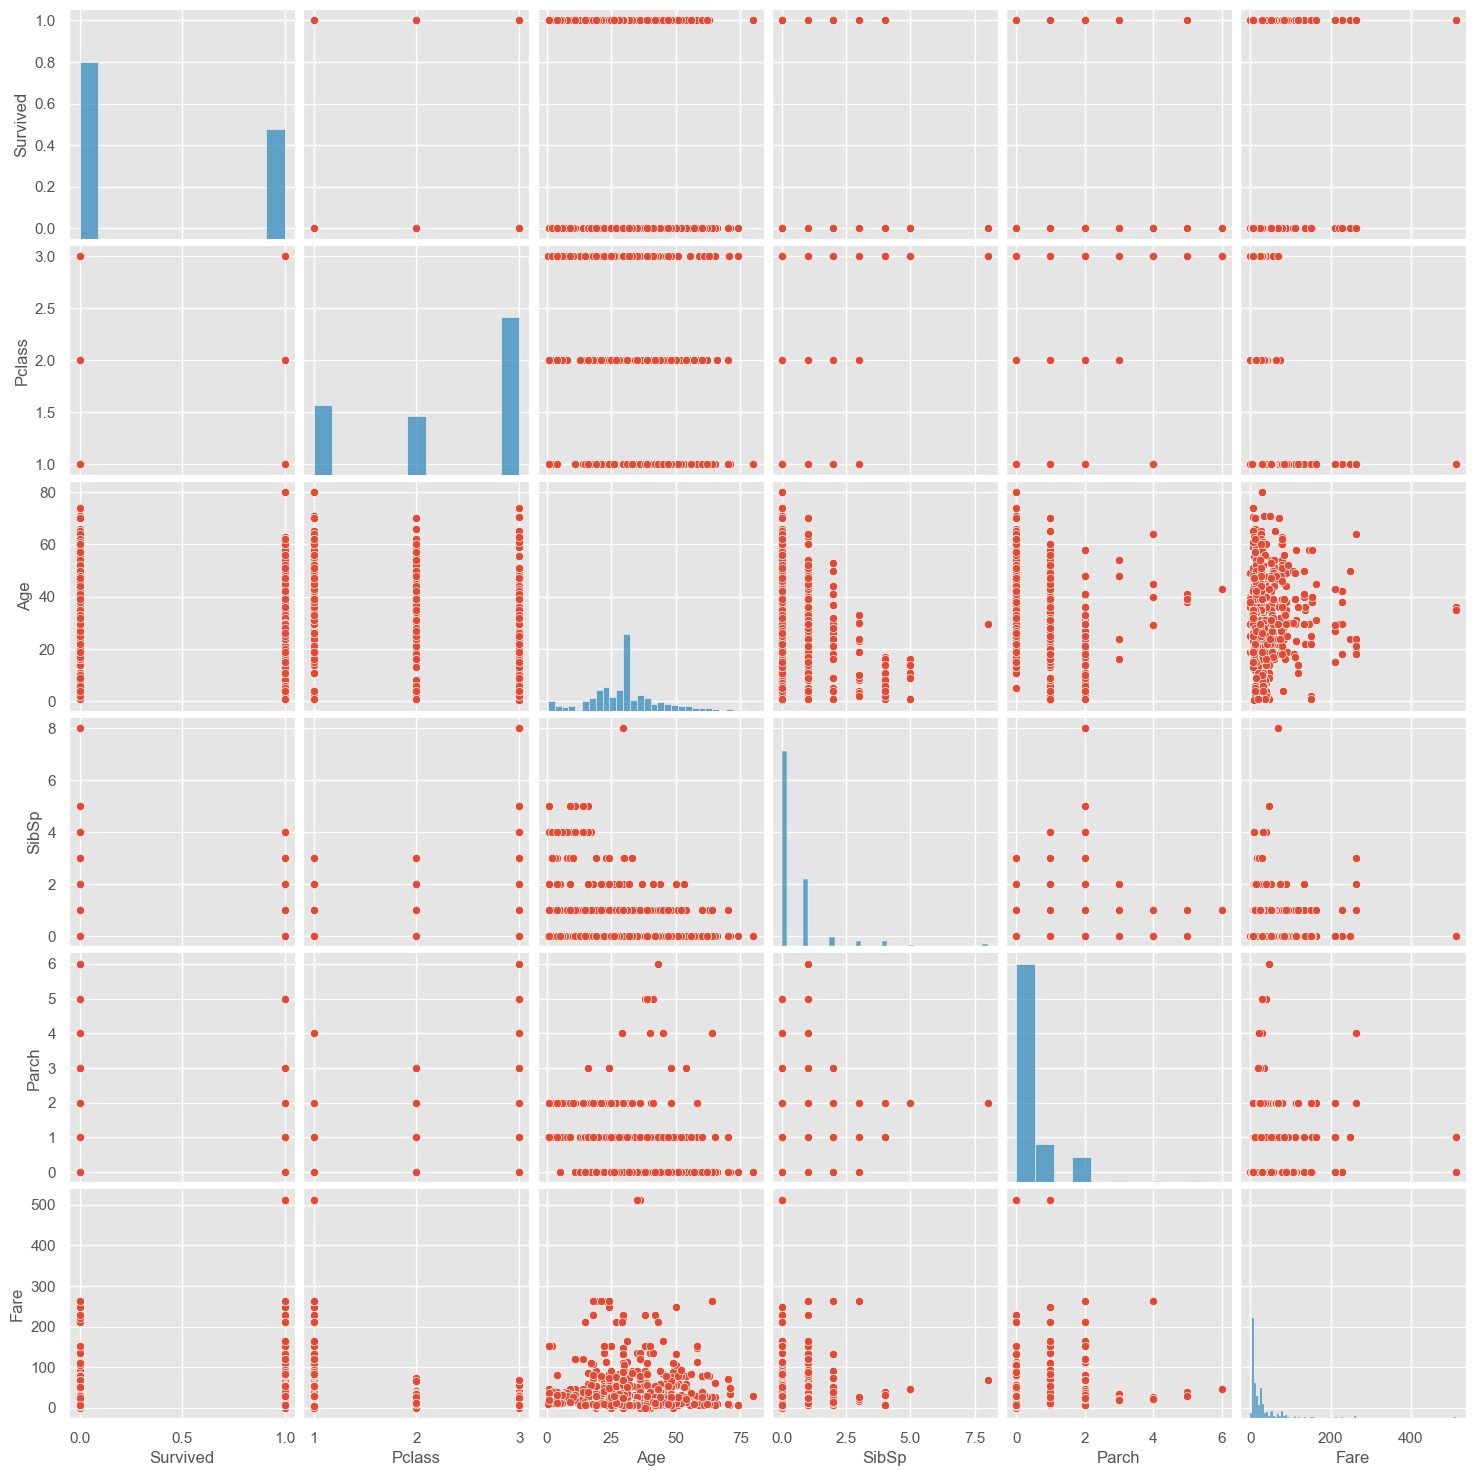

In [24]:
sns.pairplot(ds1,palette="spring_r")
plt.show()

Survived       AxesSubplot(0.125,0.653529;0.227941x0.226471)
Pclass      AxesSubplot(0.398529,0.653529;0.227941x0.226471)
Age         AxesSubplot(0.672059,0.653529;0.227941x0.226471)
SibSp          AxesSubplot(0.125,0.381765;0.227941x0.226471)
Parch       AxesSubplot(0.398529,0.381765;0.227941x0.226471)
Fare        AxesSubplot(0.672059,0.381765;0.227941x0.226471)
dtype: object

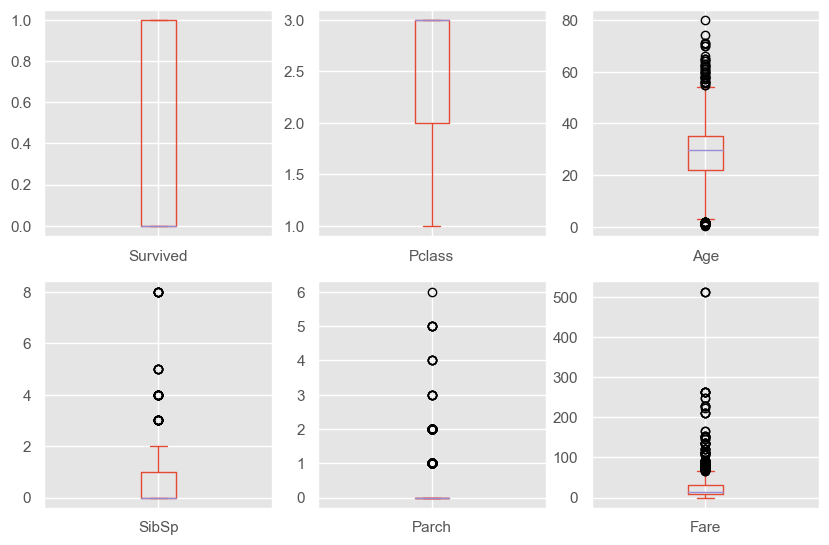

In [25]:
#CHECKING FOR OUTLIERS
ds1.plot(kind='box',subplots=True,figsize=(10,10),layout=(3,3))

Outliers are present in Fare and Age column as predicted earlier

In [26]:
#CHECKING FOR OUTLIERS
from scipy.stats import zscore
f=ds1[['Fare','Age']]
z=np.abs(zscore(f))
z

,Fare,Age
0,0.502445,0.592481
1,0.786845,0.638789
2,0.488854,0.284663
3,0.420730,0.407926
4,0.486337,0.407926
...,...,...
886,0.386671,0.207709
887,0.044381,0.823344
888,0.176263,0.000000
889,0.044381,0.284663


In [27]:
print(np.where(z>3))

(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
       527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
       851], dtype=int64), array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1], dtype=int64))


In [28]:
#REMOVING OUTLIERS
ds11=ds1[(z<3).all(axis=1)]
ds11

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


Therefore the outliers have been removed

In [29]:
#CHECKING FOR SKEWNESS
ds11.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.239002
SibSp       3.751753
Parch       2.840412
Fare        2.257178
dtype: float64

Skewness is very high in cloumns such as Pclass, Sibsp, Parch and Fare. Among these Fare is only the numerical column and other columns are categorical column. So it is enough to the skewness in that Fare column only

In [30]:
#REMOVING SKEWNESS USING CUBEROOT METHOD
ds11[['Fare']] = np.cbrt(ds11[['Fare']])
ds11.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.239002
SibSp       3.751753
Parch       2.840412
Fare        0.619588
dtype: float64

In [31]:
#SEPERATING CATEGORICAL AND NUMERICAL COLUMNS
cat_col=[]
num_col=[]
for i in ds1.dtypes.index:
    if ds1.dtypes[i]=="object":
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['Sex', 'Embarked']
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [32]:
# LABEL ENCODING TECHNIQUE
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
    ds11[i]=le.fit_transform(ds11[i].astype(str))
ds11

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,1.935438,2
1,1,1,0,38.000000,1,0,4.146318,0
2,1,3,0,26.000000,0,0,1.993730,2
3,1,1,0,35.000000,1,0,3.758647,2
4,0,3,1,35.000000,0,0,2.004158,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2.351335,2
887,1,1,0,19.000000,0,0,3.107233,2
888,0,3,0,29.699118,1,2,2.862294,2
889,1,1,1,26.000000,0,0,3.107233,0


CHECKING FOR CORRELATION

In [33]:
ds11.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.333535,-0.534012,-0.063386,-0.041734,0.080065,0.322959,-0.161798
Pclass,-0.333535,1.000000,0.123990,-0.337475,0.093871,0.051075,-0.644931,0.132880
Sex,-0.534012,0.123990,1.000000,0.068343,-0.109263,-0.250154,-0.258840,0.105550
Age,-0.063386,-0.337475,0.068343,1.000000,-0.231058,-0.193375,0.112583,-0.017764
SibSp,-0.041734,0.093871,-0.109263,-0.231058,1.000000,0.408282,0.321126,0.063416
Parch,0.080065,0.051075,-0.250154,-0.193375,0.408282,1.000000,0.296411,0.045652
Fare,0.322959,-0.644931,-0.258840,0.112583,0.321126,0.296411,1.000000,-0.170125
Embarked,-0.161798,0.132880,0.105550,-0.017764,0.063416,0.045652,-0.170125,1.000000


From the above report we can infer that the variables like Pclass, Sex, Fare have a high correlation with the target variable. At the same time Parch and Sibsp have very low correlation with the target variable

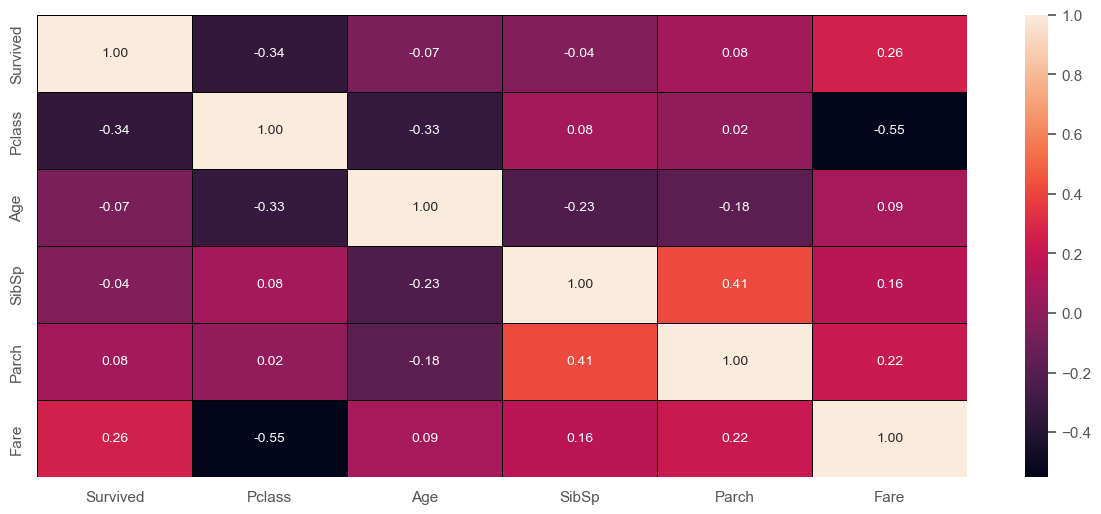

In [34]:
plt.figure(figsize=(15,6))
sns.heatmap(ds1.corr(),annot=True,linewidths=0.6,linecolor='black',fmt='0.2f')
plt.show()

In [35]:
#SEPERATING INDEPENDENT VARIABLES AND TARGET
x1 = ds11.drop('Survived',axis=1)
y1 = ds11['Survived']
print(x1)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0         3    1  22.000000      1      0  1.935438         2
1         1    0  38.000000      1      0  4.146318         0
2         3    0  26.000000      0      0  1.993730         2
3         1    0  35.000000      1      0  3.758647         2
4         3    1  35.000000      0      0  2.004158         2
..      ...  ...        ...    ...    ...       ...       ...
886       2    1  27.000000      0      0  2.351335         2
887       1    0  19.000000      0      0  3.107233         2
888       3    0  29.699118      1      2  2.862294         2
889       1    1  26.000000      0      0  3.107233         0
890       3    1  32.000000      0      0  1.978946         1

[864 rows x 7 columns]


In [36]:
y1

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 864, dtype: int64

In [37]:
#SCALING TO REMOVE BIASNESS - STANDARD SCALING
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1=st.fit_transform(x1)
x1

array([[ 0.8017188 ,  0.7330529 , -0.58662226, ..., -0.46343475,
        -0.80901498,  0.57215883],
       [-1.64161469, -1.36415804,  0.69509832, ..., -0.46343475,
         1.59618542, -2.00255591],
       [ 0.8017188 , -1.36415804, -0.26619211, ..., -0.46343475,
        -0.74559947,  0.57215883],
       ...,
       [ 0.8017188 , -1.36415804,  0.03013509, ...,  2.05485221,
         0.19930511,  0.57215883],
       [-1.64161469,  0.7330529 , -0.26619211, ..., -0.46343475,
         0.46577169, -2.00255591],
       [ 0.8017188 ,  0.7330529 ,  0.21445311, ..., -0.46343475,
        -0.76168349, -0.71519854]])

In [38]:
x1=pd.DataFrame(data=x1)
x1

,0,1,2,3,4,5,6
0,0.801719,0.733053,-0.586622,0.433911,-0.463435,-0.809015,0.572159
1,-1.641615,-1.364158,0.695098,0.433911,-0.463435,1.596185,-2.002556
2,0.801719,-1.364158,-0.266192,-0.471642,-0.463435,-0.745599,0.572159
3,-1.641615,-1.364158,0.454776,0.433911,-0.463435,1.174441,0.572159
4,0.801719,0.733053,0.454776,-0.471642,-0.463435,-0.734255,0.572159
...,...,...,...,...,...,...,...
859,-0.419948,0.733053,-0.186085,-0.471642,-0.463435,-0.356564,0.572159
860,-1.641615,-1.364158,-0.826945,-0.471642,-0.463435,0.465772,0.572159
861,0.801719,-1.364158,0.030135,0.433911,2.054852,0.199305,0.572159
862,-1.641615,0.733053,-0.266192,-0.471642,-0.463435,0.465772,-2.002556


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x1.columns
vif

,VIF Factor,features
0,2.309367,0
1,1.125457,1
2,1.205025,2
3,1.479039,3
4,1.376107,4
5,2.616528,5
6,1.060802,6


From the above data frame it is clear that the dataset is free from multicolinearity problem

In [40]:
y1.value_counts()

0    537
1    327
Name: Survived, dtype: int64

In [41]:
#BALANCING THE DATA SET
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x1,y1)
y1.value_counts()

0    537
1    537
Name: Survived, dtype: int64

MODELLING

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [43]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [44]:
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(751, 7)
(751,)
(323, 7)
(323,)


In [45]:
m1=LogisticRegression()
m1.fit(x1_train,y1_train)
testprediction1=m1.predict(x1_test)
print(accuracy_score(y1_test,testprediction1))
print(confusion_matrix(y1_test,testprediction1))
print(classification_report(y1_test,testprediction1))
score1=cross_val_score(m1,x1,y1)
print(score1)
print(score1.mean())
print(((accuracy_score(y1_test,testprediction1))-score1.mean()))

0.7739938080495357
[[135  25]
 [ 48 115]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       160
           1       0.82      0.71      0.76       163

    accuracy                           0.77       323
   macro avg       0.78      0.77      0.77       323
weighted avg       0.78      0.77      0.77       323

[0.74418605 0.80930233 0.77209302 0.82790698 0.79439252]
0.7895761790915019
-0.015582371041966248


In [46]:
from sklearn.ensemble import RandomForestClassifier
m2=RandomForestClassifier()
m2.fit(x1_train,y1_train)
testprediction2=m2.predict(x1_test)
print(accuracy_score(y1_test,testprediction2))
print(confusion_matrix(y1_test,testprediction2))
print(classification_report(y1_test,testprediction2))
score2=cross_val_score(m2,x1,y1)
print(score2)
print(score2.mean())
print(((accuracy_score(y1_test,testprediction2))-score2.mean()))

0.8080495356037152
[[136  24]
 [ 38 125]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       160
           1       0.84      0.77      0.80       163

    accuracy                           0.81       323
   macro avg       0.81      0.81      0.81       323
weighted avg       0.81      0.81      0.81       323

[0.7627907  0.82325581 0.80930233 0.86976744 0.8317757 ]
0.8193783960008693
-0.011328860397154084


In [47]:
from sklearn.ensemble import ExtraTreesClassifier
m3=ExtraTreesClassifier()
m3.fit(x1_train,y1_train)
testprediction3=m3.predict(x1_test)
print(accuracy_score(y1_test,testprediction3))
print(confusion_matrix(y1_test,testprediction3))
print(classification_report(y1_test,testprediction3))
score3=cross_val_score(m3,x1,y1)
print(score3)
print(score3.mean())
print(((accuracy_score(y1_test,testprediction3))-score3.mean()))

0.7987616099071208
[[134  26]
 [ 39 124]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       160
           1       0.83      0.76      0.79       163

    accuracy                           0.80       323
   macro avg       0.80      0.80      0.80       323
weighted avg       0.80      0.80      0.80       323

[0.71627907 0.80465116 0.80930233 0.86511628 0.80373832]
0.7998174309932623
-0.0010558210861415507


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
m4=GradientBoostingClassifier()
m4.fit(x1_train,y1_train)
testprediction4=m4.predict(x1_test)
print(accuracy_score(y1_test,testprediction4))
print(confusion_matrix(y1_test,testprediction4))
print(classification_report(y1_test,testprediction4))
score4=cross_val_score(m4,x1,y1)
print(score4)
print(score4.mean())
print(((accuracy_score(y1_test,testprediction4))-score4.mean()))

0.7956656346749226
[[140  20]
 [ 46 117]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       160
           1       0.85      0.72      0.78       163

    accuracy                           0.80       323
   macro avg       0.80      0.80      0.79       323
weighted avg       0.80      0.80      0.79       323

[0.78139535 0.82790698 0.80465116 0.86046512 0.82242991]
0.8193697022386438
-0.02370406756372123


In [49]:
from sklearn.ensemble import AdaBoostClassifier
m5=AdaBoostClassifier()
m5.fit(x1_train,y1_train)
testprediction5=m5.predict(x1_test)
print(accuracy_score(y1_test,testprediction5))
print(confusion_matrix(y1_test,testprediction5))
print(classification_report(y1_test,testprediction5))
score5=cross_val_score(m5,x1,y1)
print(score5)
print(score5.mean())
print(((accuracy_score(y1_test,testprediction5))-score5.mean()))

0.7863777089783281
[[132  28]
 [ 41 122]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       160
           1       0.81      0.75      0.78       163

    accuracy                           0.79       323
   macro avg       0.79      0.79      0.79       323
weighted avg       0.79      0.79      0.79       323

[0.73488372 0.82325581 0.79069767 0.85116279 0.81775701]
0.803551401869159
-0.017173692890830816


In [50]:
from sklearn.ensemble import BaggingClassifier
m6=BaggingClassifier()
m6.fit(x1_train,y1_train)
testprediction6=m6.predict(x1_test)
print(accuracy_score(y1_test,testprediction6))
print(confusion_matrix(y1_test,testprediction6))
print(classification_report(y1_test,testprediction6))
score6=cross_val_score(m6,x1,y1)
print(score6)
print(score6.mean())
print(((accuracy_score(y1_test,testprediction6))-score6.mean()))

0.7894736842105263
[[139  21]
 [ 47 116]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       160
           1       0.85      0.71      0.77       163

    accuracy                           0.79       323
   macro avg       0.80      0.79      0.79       323
weighted avg       0.80      0.79      0.79       323

[0.73953488 0.80930233 0.80465116 0.85581395 0.82242991]
0.8063464464246902
-0.016872762214163894


In [51]:
from sklearn.svm import SVC
m7=SVC()
m7.fit(x1_train,y1_train)
testprediction7=m7.predict(x1_test)
print(accuracy_score(y1_test,testprediction7))
print(confusion_matrix(y1_test,testprediction7))
print(classification_report(y1_test,testprediction7))
score7=cross_val_score(m7,x1,y1)
print(score7)
print(score7.mean())
print(((accuracy_score(y1_test,testprediction7))-score7.mean()))

0.8111455108359134
[[140  20]
 [ 41 122]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       160
           1       0.86      0.75      0.80       163

    accuracy                           0.81       323
   macro avg       0.82      0.81      0.81       323
weighted avg       0.82      0.81      0.81       323

[0.76744186 0.81860465 0.8        0.86976744 0.8317757 ]
0.8175179308845903
-0.006372420048676997


In [52]:
from sklearn.tree import DecisionTreeClassifier
m8=DecisionTreeClassifier()
m8.fit(x1_train,y1_train)
testprediction8=m8.predict(x1_test)
print(accuracy_score(y1_test,testprediction8))
print(confusion_matrix(y1_test,testprediction8))
print(classification_report(y1_test,testprediction8))
score8=cross_val_score(m8,x1,y1)
print(score8)
print(score8.mean())
print(((accuracy_score(y1_test,testprediction8))-score8.mean()))

0.7678018575851393
[[132  28]
 [ 47 116]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       160
           1       0.81      0.71      0.76       163

    accuracy                           0.77       323
   macro avg       0.77      0.77      0.77       323
weighted avg       0.77      0.77      0.77       323

[0.73953488 0.77209302 0.77209302 0.85116279 0.8271028 ]
0.7923973049337101
-0.024595447348570776


Therefore from the above models EXTRA TREE CLASSIFIER has been selected as the best model for this problem based on the ACCURACY SCORE and the cross validation score

In [60]:
best_model=ExtraTreesClassifier(criterion='gini',max_features='sqrt',n_jobs=-1,random_state=42,bootstrap=False)
best_model.fit(x1_train,y1_train)
prediction=best_model.predict(x1_test)
accuracy=accuracy_score(y1_test,prediction)
print(accuracy)

0.8018575851393189


In [61]:
def predict(survival_probabilty):
    survival_probabilty=survival_probabilty.reshape(1,-1)
    pred=best_model.predict(survival_probabilty)
    print("PREDICTED VALUE:",pred)
    if pred==1:
        print("PASSENGER SURVIVED")
    else:
        print("PASSENGER NOT SURVIVED")
survival_probabilty=np.array([-0.419948,0.733053,-0.186085,-0.471642,-0.463435,-0.356564,0.572159])
predict(survival_probabilty)

PREDICTED VALUE: [0]
PASSENGER NOT SURVIVED
